# Sea Level Predictor
## We will analyze a dataset of the global average sea level change since 1880. We will use the data to predict the sea level change through year 2050.

### Data Source
### Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; ### NOAA, 2015.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df_sea_level = pd.read_csv('epa-sea-level.csv')

In [68]:
df_sea_level

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


### In the next plot, we can observe the rise in the sea level from 1880 to 2013

Text(0, 0.5, 'Sea Level (inches)')

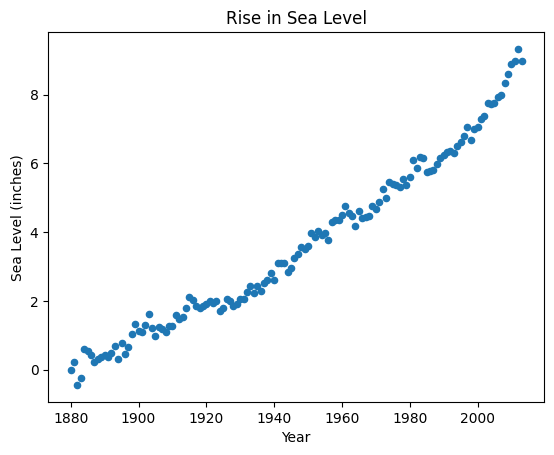

In [61]:
fig, ax = plt.subplots()
df_sea_level.plot(x='Year', y='CSIRO Adjusted Sea Level', kind='scatter', ax=ax);
ax.set_title('Rise in Sea Level')
ax.set_ylabel('Sea Level (inches)')

### Using the line of best fit, we can observe that the sea level rose steadily until the year 2000. Then it started rising exponentially. Thus, the prediction for the year 2050, using data after the year 2000 should be way off.

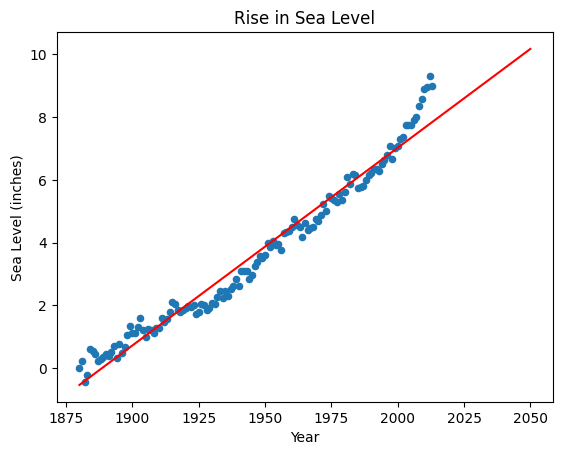

In [62]:
lr = linregress(x=df_sea_level.Year, y=df_sea_level['CSIRO Adjusted Sea Level'])
_2014_to_2050 = pd.Series(range(2014,2051))
x = pd.concat([df_sea_level.Year, _2014_to_2050], axis=0)
ax.plot(x, lr.intercept + lr.slope*x, 'r');
fig

### Using the data from the year 2000 and onward, we can observe that the sea level is expected to rise by 15 in, and not by 10.

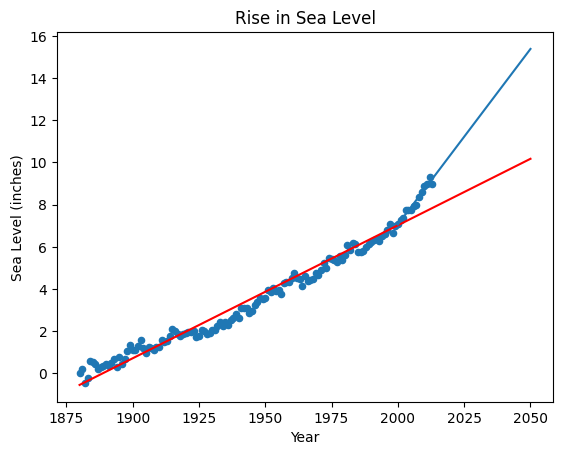

In [63]:
df_sea_level_after_2000 = df_sea_level[df_sea_level.Year >= 2000]
lr2 = linregress(x=df_sea_level_after_2000.Year, y=df_sea_level_after_2000['CSIRO Adjusted Sea Level'])
x2 = pd.concat([df_sea_level_after_2000.Year, _2014_to_2050], axis=0)
ax.plot(x2, lr2.intercept + lr2.slope*x2);
fig